In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths
input_folder = '/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/share_it100'
output_folder = '/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/share_it100c'

# Template
template = cv2.imread('/home/vamsi/cv/project/blue.png')
h, w, _ = template.shape
threshold = 0.8  # Adjust as needed

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Walk through the directory structure
for root, dirs, files in os.walk(input_folder):
    # Maintain subfolder structure
    relative_path = os.path.relpath(root, input_folder)
    output_path = os.path.join(output_folder, relative_path)
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Include supported image types
            input_image_path = os.path.join(root, file)
            output_image_path = os.path.join(output_path, file)

            # Process image
            main_image = cv2.imread(input_image_path)
            result = cv2.matchTemplate(main_image, template, cv2.TM_CCOEFF_NORMED)
            locations = np.where(result >= threshold)
            output_image = main_image.copy()

            for pt in zip(*locations[::-1]):
                roi = main_image[pt[1]:pt[1] + h, pt[0]:pt[0] + w]
                roi_h, roi_w, _ = roi.shape

                if 0.9 * w <= roi_w <= 1.2 * w and 0.9 * h <= roi_h <= 1.2 * h:
                    cv2.rectangle(output_image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

            # Save processed image
            cv2.imwrite(output_image_path, output_image)

print("Processing complete. Edited images saved to:", output_folder)


Processing complete. Edited images saved to: /home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/share_it100c


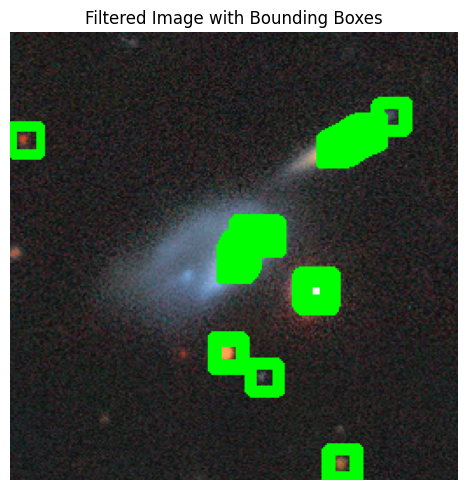

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

main_image = cv2.imread('/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dc/0/image_1043.png')
template = cv2.imread('/home/vamsi/cv/project/blue.png')

result = cv2.matchTemplate(main_image, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.5 # Adjust as needed
locations = np.where(result >= threshold)

h, w, _ = template.shape

output_image = main_image.copy()

for pt in zip(*locations[::-1]):
    roi = main_image[pt[1]:pt[1] + h, pt[0]:pt[0] + w]

    roi_h, roi_w, _ = roi.shape
    
    if 0.9 * w <= roi_w <= 1.2 * w and 0.9 * h <= roi_h <= 1.2 * h:
        
        cv2.rectangle(output_image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)  # Green bounding box

output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(output_image_rgb)
plt.title("Filtered Image with Bounding Boxes")
plt.axis("off")
plt.tight_layout()
plt.show()


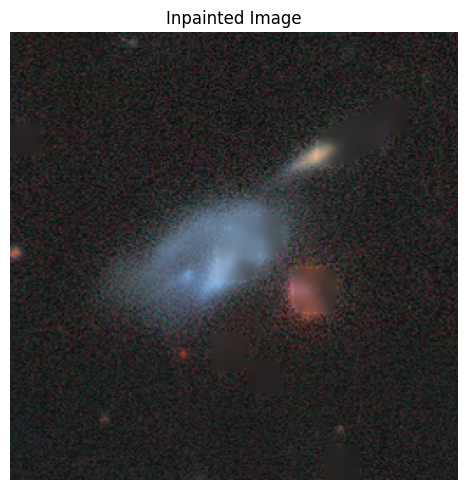

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Match template
result = cv2.matchTemplate(main_image, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.5  # Adjust as needed
locations = np.where(result >= threshold)

h, w, _ = template.shape
output_image = main_image.copy()

# Create a mask for inpainting
mask = np.zeros(main_image.shape[:2], dtype=np.uint8)

for pt in zip(*locations[::-1]):
    roi = main_image[pt[1]:pt[1] + h, pt[0]:pt[0] + w]
    roi_h, roi_w, _ = roi.shape

    if 0.9 * w <= roi_w <= 1.2 * w and 0.9 * h <= roi_h <= 1.2 * h:
        # Draw the bounding box
        cv2.rectangle(output_image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

        # Mark the region in the mask
        mask[pt[1]:pt[1] + h, pt[0]:pt[0] + w] = 255

# Perform inpainting
inpainted_image = cv2.inpaint(main_image, mask, inpaintRadius=7, flags=cv2.INPAINT_TELEA)

# Convert the inpainted image to RGB for display
inpainted_image_rgb = cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB)

# Display the inpainted image
plt.figure(figsize=(10, 5))
plt.imshow(inpainted_image_rgb)
plt.title("Inpainted Image")
plt.axis("off")
plt.tight_layout()
plt.show()


In [32]:
import os
import cv2
import numpy as np

# Paths
input_folder = '/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dc/0'  # Replace with your input folder path
output_folder = '/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/0'  # Replace with your output folder path
template_path = '/home/vamsi/cv/project/blue.png'

# Load template
template = cv2.imread(template_path)
h, w, _ = template.shape
threshold = 0.5  # Adjust as needed

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Walk through the directory structure
for root, dirs, files in os.walk(input_folder):
    # Maintain subfolder structure
    relative_path = os.path.relpath(root, input_folder)
    output_path = os.path.join(output_folder, relative_path)
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Include supported image types
            input_image_path = os.path.join(root, file)
            output_image_path = os.path.join(output_path, file)

            # Process the image
            main_image = cv2.imread(input_image_path)
            result = cv2.matchTemplate(main_image, template, cv2.TM_CCOEFF_NORMED)
            locations = np.where(result >= threshold)
            output_image = main_image.copy()

            # Create a mask for inpainting
            mask = np.zeros(main_image.shape[:2], dtype=np.uint8)

            for pt in zip(*locations[::-1]):
                roi = main_image[pt[1]:pt[1] + h, pt[0]:pt[0] + w]
                roi_h, roi_w, _ = roi.shape

                if 0.9 * w <= roi_w <= 1.2 * w and 0.9 * h <= roi_h <= 1.2 * h:
                    # Draw the bounding box
                    cv2.rectangle(output_image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

                    # Mark the region in the mask
                    mask[pt[1]:pt[1] + h, pt[0]:pt[0] + w] = 255

            # Perform inpainting
            inpainted_image = cv2.inpaint(main_image, mask, inpaintRadius=7, flags=cv2.INPAINT_TELEA)

            # Save the inpainted image
            cv2.imwrite(output_image_path, inpainted_image)

print("Processing complete. Edited images saved to:", output_folder)


Processing complete. Edited images saved to: /home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/0


In [88]:
main_image = cv2.imread('dc/1/image_2878.png')
template = cv2.imread('/home/vamsi/cv/project/blue.png')


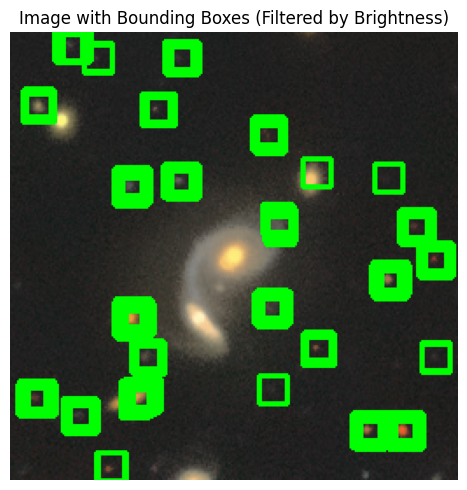

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert images to grayscale
gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Template matching
result = cv2.matchTemplate(gray_main, gray_template, cv2.TM_CCOEFF_NORMED)

threshold = 0.5 # Template matching threshold
brightness_threshold = 100 # Brightness threshold (0-255)
locations = np.where(result >= threshold)

# Draw bounding boxes on the main image
for pt in zip(*locations[::-1]):
    h, w = gray_template.shape[:2]

    # Extract the region of interest (ROI) in the main image
    roi = gray_main[pt[1]:pt[1] + h, pt[0]:pt[0] + w]

    # Check if the average brightness of the ROI is below the threshold
    if np.mean(roi) < brightness_threshold:
        cv2.rectangle(main_image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)  # Green bounding box

# Convert the image to RGB for displaying with matplotlib
main_image_rgb = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)

# Plot the image with bounding boxes
plt.figure(figsize=(10, 5))
plt.imshow(main_image_rgb)
plt.title("Image with Bounding Boxes (Filtered by Brightness)")
plt.axis("off")
plt.tight_layout()
plt.show()


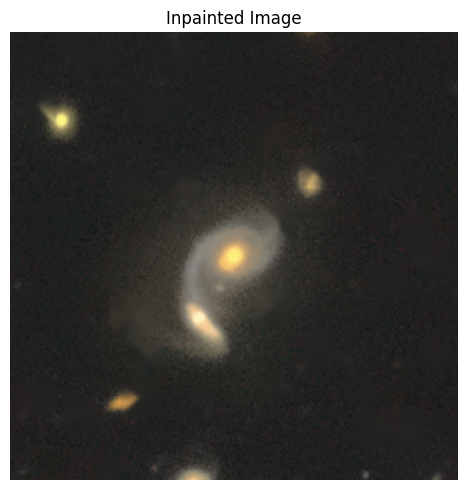

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert images to grayscale
gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Template matching
result = cv2.matchTemplate(gray_main, gray_template, cv2.TM_CCOEFF_NORMED)

threshold = 0.5  # Template matching threshold
brightness_threshold = 100  # Brightness threshold (0-255)
locations = np.where(result >= threshold)

# Create a mask for inpainting
mask = np.zeros(gray_main.shape, dtype=np.uint8)

# Draw bounding boxes and create a mask for inpainting
for pt in zip(*locations[::-1]):
    h, w = gray_template.shape[:2]

    # Extract the region of interest (ROI) in the main image
    roi = gray_main[pt[1]:pt[1] + h, pt[0]:pt[0] + w]

    # Check if the average brightness of the ROI is below the threshold
    if np.mean(roi) < brightness_threshold:
        # Mark the region in the mask
        mask[pt[1]:pt[1] + h, pt[0]:pt[0] + w] = 255

# Inpaint the regions marked in the mask
inpainted_image = cv2.inpaint(main_image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Convert the inpainted image to RGB for displaying with matplotlib
inpainted_image_rgb = cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB)

# Plot the inpainted image
plt.figure(figsize=(10, 5))
plt.imshow(inpainted_image_rgb)
plt.title("Inpainted Image")
plt.axis("off")
plt.tight_layout()
plt.show()


In [90]:
import os
import cv2
import numpy as np

# Paths
input_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dc/1"  # Folder with original images
output_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/1"  # Folder to save processed images
template_path = "/home/vamsi/cv/project/blue.png"  # Path to the template image

# Load the template image
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
template_h, template_w = template.shape[:2]

# Parameters
threshold = 0.5  # Template matching threshold
brightness_threshold = 100  # Brightness threshold (0-255)

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process each image in the input folder
for root, _, files in os.walk(input_folder):
    # Create the corresponding output folder structure
    relative_path = os.path.relpath(root, input_folder)
    output_subfolder = os.path.join(output_folder, relative_path)
    os.makedirs(output_subfolder, exist_ok=True)

    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            input_image_path = os.path.join(root, file)
            output_image_path = os.path.join(output_subfolder, file)

            # Read the image
            main_image = cv2.imread(input_image_path)
            gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

            # Template matching
            result = cv2.matchTemplate(gray_main, template, cv2.TM_CCOEFF_NORMED)
            locations = np.where(result >= threshold)

            # Create a mask for inpainting
            mask = np.zeros(gray_main.shape, dtype=np.uint8)

            # Identify regions for inpainting
            for pt in zip(*locations[::-1]):
                roi = gray_main[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w]

                # Check brightness condition
                if np.mean(roi) < brightness_threshold:
                    mask[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w] = 255

            # Inpaint the regions
            inpainted_image = cv2.inpaint(main_image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

            # Save the processed image
            cv2.imwrite(output_image_path, inpainted_image)

print("Processing complete. Edited images saved to:", output_folder)


Processing complete. Edited images saved to: /home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/1


# class2 #


In [96]:
main_image = cv2.imread('dc/2/image_5508.png')
template = cv2.imread('/home/vamsi/cv/project/blue.png')


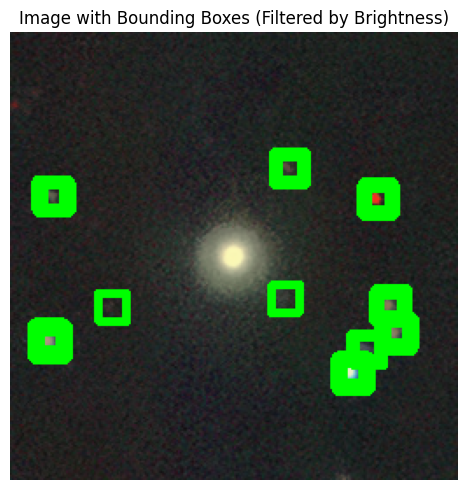

In [97]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert images to grayscale
gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Template matching
result = cv2.matchTemplate(gray_main, gray_template, cv2.TM_CCOEFF_NORMED)

threshold = 0.5 # Template matching threshold
brightness_threshold = 100 # Brightness threshold (0-255)
locations = np.where(result >= threshold)

# Draw bounding boxes on the main image
for pt in zip(*locations[::-1]):
    h, w = gray_template.shape[:2]

    # Extract the region of interest (ROI) in the main image
    roi = gray_main[pt[1]:pt[1] + h, pt[0]:pt[0] + w]

    # Check if the average brightness of the ROI is below the threshold
    if np.mean(roi) < brightness_threshold:
        cv2.rectangle(main_image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)  # Green bounding box

# Convert the image to RGB for displaying with matplotlib
main_image_rgb = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)

# Plot the image with bounding boxes
plt.figure(figsize=(10, 5))
plt.imshow(main_image_rgb)
plt.title("Image with Bounding Boxes (Filtered by Brightness)")
plt.axis("off")
plt.tight_layout()
plt.show()


In [98]:
import os
import cv2
import numpy as np

# Paths
input_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dc/2"  # Folder with original images
output_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/2"  # Folder to save processed images
template_path = "/home/vamsi/cv/project/blue.png"  # Path to the template image

# Load the template image
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
template_h, template_w = template.shape[:2]

# Parameters
threshold = 0.5  # Template matching threshold
brightness_threshold = 100  # Brightness threshold (0-255)

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process each image in the input folder
for root, _, files in os.walk(input_folder):
    # Create the corresponding output folder structure
    relative_path = os.path.relpath(root, input_folder)
    output_subfolder = os.path.join(output_folder, relative_path)
    os.makedirs(output_subfolder, exist_ok=True)

    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            input_image_path = os.path.join(root, file)
            output_image_path = os.path.join(output_subfolder, file)

            # Read the image
            main_image = cv2.imread(input_image_path)
            gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

            # Template matching
            result = cv2.matchTemplate(gray_main, template, cv2.TM_CCOEFF_NORMED)
            locations = np.where(result >= threshold)

            # Create a mask for inpainting
            mask = np.zeros(gray_main.shape, dtype=np.uint8)

            # Identify regions for inpainting
            for pt in zip(*locations[::-1]):
                roi = gray_main[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w]

                # Check brightness condition
                if np.mean(roi) < brightness_threshold:
                    mask[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w] = 255

            # Inpaint the regions
            inpainted_image = cv2.inpaint(main_image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

            # Save the processed image
            cv2.imwrite(output_image_path, inpainted_image)

print("Processing complete. Edited images saved to:", output_folder)


Processing complete. Edited images saved to: /home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/2


# class 3 #

In [112]:
main_image = cv2.imread('dc/4/image_7748.png')
template = cv2.imread('/home/vamsi/cv/project/blue.png')


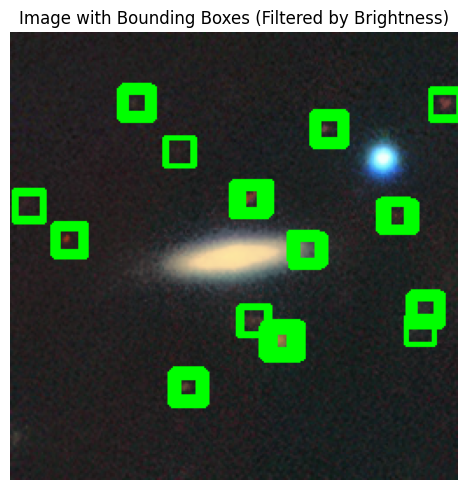

In [113]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert images to grayscale
gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Template matching
result = cv2.matchTemplate(gray_main, gray_template, cv2.TM_CCOEFF_NORMED)

threshold = 0.5 
brightness_threshold = 100 # Brightness threshold (0-255)
locations = np.where(result >= threshold)

for pt in zip(*locations[::-1]):
    h, w = gray_template.shape[:2]

    roi = gray_main[pt[1]:pt[1] + h, pt[0]:pt[0] + w]

    if np.mean(roi) < brightness_threshold:
        cv2.rectangle(main_image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)  # Green bounding box

main_image_rgb = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(main_image_rgb)
plt.title("Image with Bounding Boxes (Filtered by Brightness)")
plt.axis("off")
plt.tight_layout()
plt.show()


In [114]:
import os
import cv2
import numpy as np

# Paths
input_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dc/3"  # Folder with original images
output_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/3"  # Folder to save processed images
template_path = "/home/vamsi/cv/project/blue.png"  # Path to the template image

# Load the template image
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
template_h, template_w = template.shape[:2]

# Parameters
threshold = 0.5  # Template matching threshold
brightness_threshold = 100  # Brightness threshold (0-255)

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process each image in the input folder
for root, _, files in os.walk(input_folder):
    # Create the corresponding output folder structure
    relative_path = os.path.relpath(root, input_folder)
    output_subfolder = os.path.join(output_folder, relative_path)
    os.makedirs(output_subfolder, exist_ok=True)

    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            input_image_path = os.path.join(root, file)
            output_image_path = os.path.join(output_subfolder, file)

            # Read the image
            main_image = cv2.imread(input_image_path)
            gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

            # Template matching
            result = cv2.matchTemplate(gray_main, template, cv2.TM_CCOEFF_NORMED)
            locations = np.where(result >= threshold)

            # Create a mask for inpainting
            mask = np.zeros(gray_main.shape, dtype=np.uint8)

            # Identify regions for inpainting
            for pt in zip(*locations[::-1]):
                roi = gray_main[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w]

                # Check brightness condition
                if np.mean(roi) < brightness_threshold:
                    mask[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w] = 255

            # Inpaint the regions
            inpainted_image = cv2.inpaint(main_image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

            # Save the processed image
            cv2.imwrite(output_image_path, inpainted_image)

print("Processing complete. Edited images saved to:", output_folder)


Processing complete. Edited images saved to: /home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/3


# class 4 # 

In [2]:
import os
import cv2
import numpy as np

# Paths
input_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dc/4"  # Folder with original images
output_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/4"  # Folder to save processed images
template_path = "/home/vamsi/cv/project/blue.png"  # Path to the template image

# Load the template image
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
template_h, template_w = template.shape[:2]

# Parameters
threshold = 0.5  # Template matching threshold
brightness_threshold = 100  # Brightness threshold (0-255)

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process each image in the input folder
for root, _, files in os.walk(input_folder):
    # Create the corresponding output folder structure
    relative_path = os.path.relpath(root, input_folder)
    output_subfolder = os.path.join(output_folder, relative_path)
    os.makedirs(output_subfolder, exist_ok=True)

    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            input_image_path = os.path.join(root, file)
            output_image_path = os.path.join(output_subfolder, file)

            # Read the image
            main_image = cv2.imread(input_image_path)
            gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

            # Template matching
            result = cv2.matchTemplate(gray_main, template, cv2.TM_CCOEFF_NORMED)
            locations = np.where(result >= threshold)

            # Create a mask for inpainting
            mask = np.zeros(gray_main.shape, dtype=np.uint8)

            # Identify regions for inpainting
            for pt in zip(*locations[::-1]):
                roi = gray_main[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w]

                # Check brightness condition
                if np.mean(roi) < brightness_threshold:
                    mask[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w] = 255

            # Inpaint the regions
            inpainted_image = cv2.inpaint(main_image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

            # Save the processed image
            cv2.imwrite(output_image_path, inpainted_image)

print("Processing complete. Edited images saved to:", output_folder)


Processing complete. Edited images saved to: /home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/4


# class 5 #

In [122]:
main_image = cv2.imread('dc/5/image_9977.png')
template = cv2.imread('/home/vamsi/cv/project/blue.png')


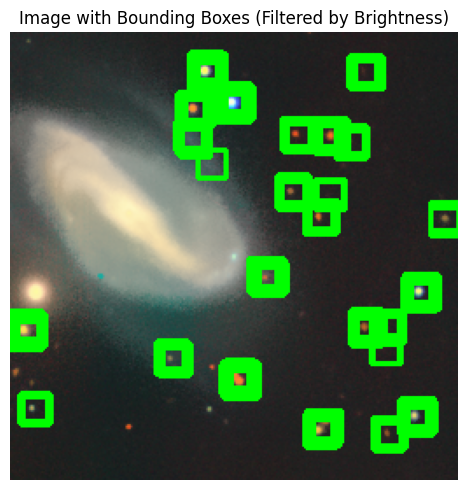

In [123]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert images to grayscale
gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Template matching
result = cv2.matchTemplate(gray_main, gray_template, cv2.TM_CCOEFF_NORMED)

threshold = 0.5 
brightness_threshold = 100 # Brightness threshold (0-255)
locations = np.where(result >= threshold)

for pt in zip(*locations[::-1]):
    h, w = gray_template.shape[:2]

    roi = gray_main[pt[1]:pt[1] + h, pt[0]:pt[0] + w]

    if np.mean(roi) < brightness_threshold:
        cv2.rectangle(main_image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)  # Green bounding box

main_image_rgb = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(main_image_rgb)
plt.title("Image with Bounding Boxes (Filtered by Brightness)")
plt.axis("off")
plt.tight_layout()
plt.show()


In [124]:
import os
import cv2
import numpy as np

# Paths
input_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dc/5"  # Folder with original images
output_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/5"  # Folder to save processed images
template_path = "/home/vamsi/cv/project/blue.png"  # Path to the template image

# Load the template image
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
template_h, template_w = template.shape[:2]

# Parameters
threshold = 0.5  # Template matching threshold
brightness_threshold = 100  # Brightness threshold (0-255)

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process each image in the input folder
for root, _, files in os.walk(input_folder):
    # Create the corresponding output folder structure
    relative_path = os.path.relpath(root, input_folder)
    output_subfolder = os.path.join(output_folder, relative_path)
    os.makedirs(output_subfolder, exist_ok=True)

    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            input_image_path = os.path.join(root, file)
            output_image_path = os.path.join(output_subfolder, file)

            # Read the image
            main_image = cv2.imread(input_image_path)
            gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

            # Template matching
            result = cv2.matchTemplate(gray_main, template, cv2.TM_CCOEFF_NORMED)
            locations = np.where(result >= threshold)

            # Create a mask for inpainting
            mask = np.zeros(gray_main.shape, dtype=np.uint8)

            # Identify regions for inpainting
            for pt in zip(*locations[::-1]):
                roi = gray_main[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w]

                # Check brightness condition
                if np.mean(roi) < brightness_threshold:
                    mask[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w] = 255

            # Inpaint the regions
            inpainted_image = cv2.inpaint(main_image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

            # Save the processed image
            cv2.imwrite(output_image_path, inpainted_image)

print("Processing complete. Edited images saved to:", output_folder)


Processing complete. Edited images saved to: /home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/5


In [137]:
main_image = cv2.imread('/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dc/9/image_15879.png')
template = cv2.imread('/home/vamsi/cv/project/blue.png')


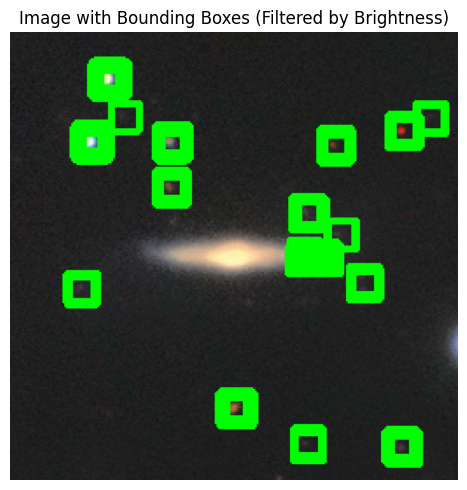

In [138]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert images to grayscale
gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Template matching
result = cv2.matchTemplate(gray_main, gray_template, cv2.TM_CCOEFF_NORMED)

threshold = 0.5 
brightness_threshold = 100 # Brightness threshold (0-255)
locations = np.where(result >= threshold)

for pt in zip(*locations[::-1]):
    h, w = gray_template.shape[:2]

    roi = gray_main[pt[1]:pt[1] + h, pt[0]:pt[0] + w]

    if np.mean(roi) < brightness_threshold:
        cv2.rectangle(main_image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)  # Green bounding box

main_image_rgb = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(main_image_rgb)
plt.title("Image with Bounding Boxes (Filtered by Brightness)")
plt.axis("off")
plt.tight_layout()
plt.show()


In [139]:
import os
import cv2
import numpy as np

# Paths
input_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dc/7"  # Folder with original images
output_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/7"  # Folder to save processed images
template_path = "/home/vamsi/cv/project/blue.png"  # Path to the template image

# Load the template image
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
template_h, template_w = template.shape[:2]

# Parameters
threshold = 0.5  # Template matching threshold
brightness_threshold = 100  # Brightness threshold (0-255)

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process each image in the input folder
for root, _, files in os.walk(input_folder):
    # Create the corresponding output folder structure
    relative_path = os.path.relpath(root, input_folder)
    output_subfolder = os.path.join(output_folder, relative_path)
    os.makedirs(output_subfolder, exist_ok=True)

    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            input_image_path = os.path.join(root, file)
            output_image_path = os.path.join(output_subfolder, file)

            # Read the image
            main_image = cv2.imread(input_image_path)
            gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

            # Template matching
            result = cv2.matchTemplate(gray_main, template, cv2.TM_CCOEFF_NORMED)
            locations = np.where(result >= threshold)

            # Create a mask for inpainting
            mask = np.zeros(gray_main.shape, dtype=np.uint8)

            # Identify regions for inpainting
            for pt in zip(*locations[::-1]):
                roi = gray_main[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w]

                # Check brightness condition
                if np.mean(roi) < brightness_threshold:
                    mask[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w] = 255

            # Inpaint the regions
            inpainted_image = cv2.inpaint(main_image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

            # Save the processed image
            cv2.imwrite(output_image_path, inpainted_image)

print("Processing complete. Edited images saved to:", output_folder)


Processing complete. Edited images saved to: /home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/7


In [142]:
import os
import cv2
import numpy as np

# Paths
input_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dc/6"  # Folder with original images
output_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/6"  # Folder to save processed images
template_path = "/home/vamsi/cv/project/blue.png"  # Path to the template image

# Load the template image
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
template_h, template_w = template.shape[:2]

# Parameters
threshold = 0.5  # Template matching threshold
brightness_threshold = 100  # Brightness threshold (0-255)

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process each image in the input folder
for root, _, files in os.walk(input_folder):
    # Create the corresponding output folder structure
    relative_path = os.path.relpath(root, input_folder)
    output_subfolder = os.path.join(output_folder, relative_path)
    os.makedirs(output_subfolder, exist_ok=True)

    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            input_image_path = os.path.join(root, file)
            output_image_path = os.path.join(output_subfolder, file)

            # Read the image
            main_image = cv2.imread(input_image_path)
            gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

            # Template matching
            result = cv2.matchTemplate(gray_main, template, cv2.TM_CCOEFF_NORMED)
            locations = np.where(result >= threshold)

            # Create a mask for inpainting
            mask = np.zeros(gray_main.shape, dtype=np.uint8)

            # Identify regions for inpainting
            for pt in zip(*locations[::-1]):
                roi = gray_main[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w]

                # Check brightness condition
                if np.mean(roi) < brightness_threshold:
                    mask[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w] = 255

            # Inpaint the regions
            inpainted_image = cv2.inpaint(main_image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

            # Save the processed image
            cv2.imwrite(output_image_path, inpainted_image)

print("Processing complete. Edited images saved to:", output_folder)


Processing complete. Edited images saved to: /home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/6


In [140]:
import os
import cv2
import numpy as np

# Paths
input_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dc/8"  # Folder with original images
output_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/8"  # Folder to save processed images
template_path = "/home/vamsi/cv/project/blue.png"  # Path to the template image

# Load the template image
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
template_h, template_w = template.shape[:2]

# Parameters
threshold = 0.5  # Template matching threshold
brightness_threshold = 100  # Brightness threshold (0-255)

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process each image in the input folder
for root, _, files in os.walk(input_folder):
    # Create the corresponding output folder structure
    relative_path = os.path.relpath(root, input_folder)
    output_subfolder = os.path.join(output_folder, relative_path)
    os.makedirs(output_subfolder, exist_ok=True)

    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            input_image_path = os.path.join(root, file)
            output_image_path = os.path.join(output_subfolder, file)

            # Read the image
            main_image = cv2.imread(input_image_path)
            gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

            # Template matching
            result = cv2.matchTemplate(gray_main, template, cv2.TM_CCOEFF_NORMED)
            locations = np.where(result >= threshold)

            # Create a mask for inpainting
            mask = np.zeros(gray_main.shape, dtype=np.uint8)

            # Identify regions for inpainting
            for pt in zip(*locations[::-1]):
                roi = gray_main[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w]

                # Check brightness condition
                if np.mean(roi) < brightness_threshold:
                    mask[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w] = 255

            # Inpaint the regions
            inpainted_image = cv2.inpaint(main_image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

            # Save the processed image
            cv2.imwrite(output_image_path, inpainted_image)

print("Processing complete. Edited images saved to:", output_folder)


Processing complete. Edited images saved to: /home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/8


In [141]:
import os
import cv2
import numpy as np

# Paths
input_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dc/9"  # Folder with original images
output_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/9"  # Folder to save processed images
template_path = "/home/vamsi/cv/project/blue.png"  # Path to the template image

# Load the template image
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
template_h, template_w = template.shape[:2]

# Parameters
threshold = 0.5  # Template matching threshold
brightness_threshold = 100  # Brightness threshold (0-255)

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process each image in the input folder
for root, _, files in os.walk(input_folder):
    # Create the corresponding output folder structure
    relative_path = os.path.relpath(root, input_folder)
    output_subfolder = os.path.join(output_folder, relative_path)
    os.makedirs(output_subfolder, exist_ok=True)

    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            input_image_path = os.path.join(root, file)
            output_image_path = os.path.join(output_subfolder, file)

            # Read the image
            main_image = cv2.imread(input_image_path)
            gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

            # Template matching
            result = cv2.matchTemplate(gray_main, template, cv2.TM_CCOEFF_NORMED)
            locations = np.where(result >= threshold)

            # Create a mask for inpainting
            mask = np.zeros(gray_main.shape, dtype=np.uint8)

            # Identify regions for inpainting
            for pt in zip(*locations[::-1]):
                roi = gray_main[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w]

                # Check brightness condition
                if np.mean(roi) < brightness_threshold:
                    mask[pt[1]:pt[1] + template_h, pt[0]:pt[0] + template_w] = 255

            # Inpaint the regions
            inpainted_image = cv2.inpaint(main_image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

            # Save the processed image
            cv2.imwrite(output_image_path, inpainted_image)

print("Processing complete. Edited images saved to:", output_folder)


Processing complete. Edited images saved to: /home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/9


In [151]:
main_image = cv2.imread('dcn/9/image_15928.png')
template = cv2.imread('/home/vamsi/cv/project/blue.png')


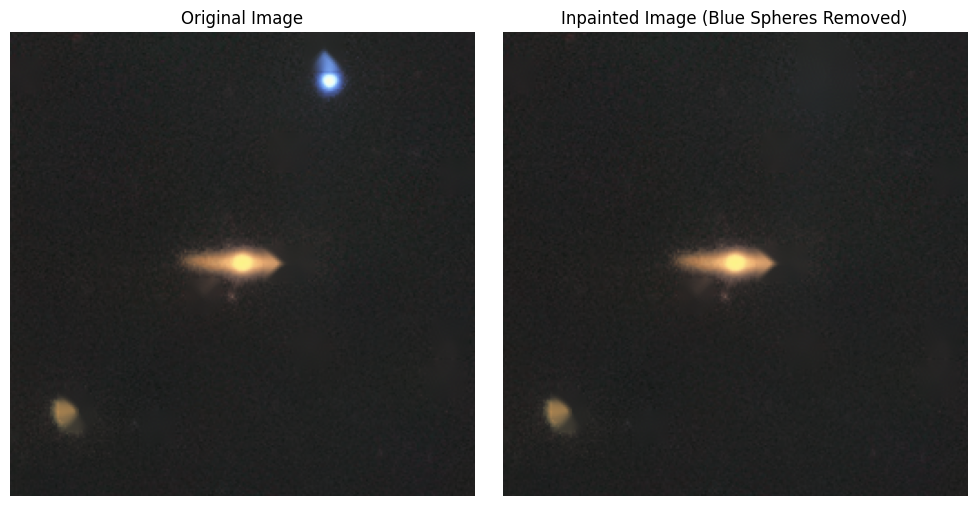

In [159]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


hsv_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2HSV)

main_image = cv2.imread('dcn/9/image_15869.png')
template = cv2.imread('/home/vamsi/cv/project/blue.png')

lower_blue = np.array([100, 50, 50])  
upper_blue = np.array([140, 255, 255])

blue_mask = cv2.inRange(hsv_main, lower_blue, upper_blue)

gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
filtered_main = cv2.bitwise_and(gray_main, gray_main, mask=blue_mask)

gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

result = cv2.matchTemplate(filtered_main, gray_template, cv2.TM_CCOEFF_NORMED)

threshold = 0.2 
locations = np.where(result >= threshold)

mask = np.zeros_like(gray_main, dtype=np.uint8)
for pt in zip(*locations[::-1]):
    h, w = gray_template.shape[:2]
    cv2.rectangle(mask, pt, (pt[0] + w, pt[1] + h), 255, -1)

inpainted_image = cv2.inpaint(main_image, mask, inpaintRadius=5, flags=cv2.INPAINT_TELEA)

main_image_rgb = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)
inpainted_image_rgb = cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(main_image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(inpainted_image_rgb)
plt.title("Inpainted Image (Blue Spheres Removed)")
plt.axis("off")

plt.tight_layout()
plt.show()


In [160]:
import os
import cv2
import numpy as np
from tqdm import tqdm

def process_and_inpaint(image_path, template_path, output_path):
    # Read the main image and template
    main_image = cv2.imread(image_path)
    template = cv2.imread(template_path)
    
    # Convert the main image to HSV and grayscale
    hsv_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2HSV)
    gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    
    # Define the HSV range for blue
    lower_blue = np.array([100, 50, 50])  
    upper_blue = np.array([140, 255, 255])
    
    # Create a mask for blue regions
    blue_mask = cv2.inRange(hsv_main, lower_blue, upper_blue)
    
    # Apply the mask to the grayscale image
    filtered_main = cv2.bitwise_and(gray_main, gray_main, mask=blue_mask)
    
    # Perform template matching
    result = cv2.matchTemplate(filtered_main, gray_template, cv2.TM_CCOEFF_NORMED)
    
    # Threshold for template matching
    threshold = 0.2
    locations = np.where(result >= threshold)
    
    # Create a mask for inpainting
    mask = np.zeros_like(gray_main, dtype=np.uint8)
    for pt in zip(*locations[::-1]):
        h, w = gray_template.shape[:2]
        cv2.rectangle(mask, pt, (pt[0] + w, pt[1] + h), 255, -1)
    
    # Perform inpainting
    inpainted_image = cv2.inpaint(main_image, mask, inpaintRadius=5, flags=cv2.INPAINT_TELEA)
    
    # Save the processed image
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    cv2.imwrite(output_path, inpainted_image)

def process_folder(input_folder, template_path, output_folder):
    # Iterate over all subfolders and images
    for root, _, files in os.walk(input_folder):
        for file in tqdm(files, desc=f"Processing {root}"):
            if file.endswith(('.png', '.jpg', '.jpeg')):  # Process image files
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_path, input_folder)
                output_path = os.path.join(output_folder, relative_path)
                
                # Process and inpaint the image
                process_and_inpaint(input_path, template_path, output_path)

# Paths
input_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dc/9"  # Folder with original images
output_folder = "/home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dcn/9"  # Folder to save processed images
template_path = "/home/vamsi/cv/project/blue.png"  # Path to the template image
# Apply the edits to all images
process_folder(input_folder, template_path, output_folder)


Processing /home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/classs/dc/9: 100%|██████████| 1873/1873 [00:14<00:00, 129.88it/s]
